In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_style("white") 
models = ["NN-I", "CNN-I", "NN-T", "RNN-T"]

In [3]:
timing_results = pd.read_csv('./times.csv')
timing_results.head()

,model,time,scheme
0,NN-I,38.44,1
1,NN-I,30.81,2
2,NN-I,36.62,3
3,NN-I,34.08,4
4,CNN-I,73.51,1


In [4]:
accuracy_results = pd.read_csv('./accuracies.csv')
accuracy_results.head()

,model,accuracy,scheme
0,NN-I,0.8724,1
1,NN-I,0.8707,2
2,NN-I,0.8089,3
3,NN-I,0.8728,4
4,CNN-I,0.9017,1


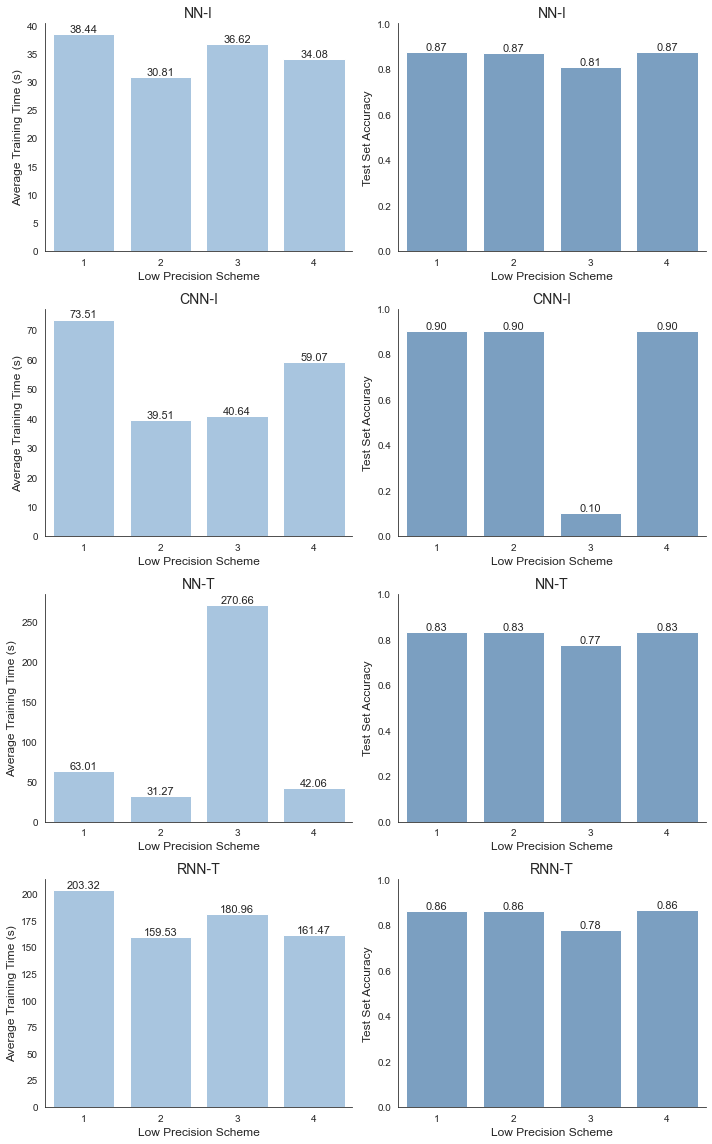

In [6]:
figure, axis = plt.subplots(4, 2, figsize=(10,16), tight_layout=True) 

for i in range(len(models)):
    sns.barplot(
        data=timing_results.loc[timing_results["model"] == models[i]],
        x="scheme", y="time", ax=axis[i,0], color="#9fc5e8ff"
    )
    axis[i,0].bar_label(axis[i,0].containers[0], fontsize=11)
    axis[i,0].set_xlabel('Low Precision Scheme', fontsize=12)
    axis[i,0].set_ylabel('Average Training Time (s)', fontsize=12)
    axis[i,0].set_title(models[i], fontsize=14)
    
    sns.barplot(
        data=accuracy_results.loc[timing_results["model"] == models[i]],
        x="scheme", y="accuracy", ax=axis[i,1], color="#6f9fcdff"
    )
    axis[i,1].bar_label(axis[i,1].containers[0], fontsize=11, fmt='%.2f')
    axis[i,1].set_ylim(0,1)
    axis[i,1].set_xlabel('Low Precision Scheme', fontsize=12)
    axis[i,1].set_ylabel('Test Set Accuracy', fontsize=12)
    axis[i,1].set_title(models[i], fontsize=14)

sns.despine()
plt.savefig('./plots.png', bbox_inches='tight',dpi=600)
plt.show()